### Badgeholder Survery

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = {
    'Badgeholder': ['Badgeholder 1', 'Badgeholder 1', 'Badgeholder 1', 'Badgeholder 1', 'Badgeholder 1',
                    'Badgeholder 2', 'Badgeholder 2', 'Badgeholder 2', 'Badgeholder 2', 'Badgeholder 2',
                    'Badgeholder 3', 'Badgeholder 3', 'Badgeholder 3', 'Badgeholder 3', 'Badgeholder 3',
                    'Badgeholder 4', 'Badgeholder 4', 'Badgeholder 4', 'Badgeholder 4', 'Badgeholder 4',
                    'Badgeholder 5', 'Badgeholder 5', 'Badgeholder 5', 'Badgeholder 5', 'Badgeholder 5',
                    'Badgeholder 6', 'Badgeholder 6', 'Badgeholder 6', 'Badgeholder 6', 'Badgeholder 6',
                    'Badgeholder 7', 'Badgeholder 7', 'Badgeholder 7', 'Badgeholder 7', 'Badgeholder 7',
                    'Badgeholder 8', 'Badgeholder 8', 'Badgeholder 8', 'Badgeholder 8', 'Badgeholder 8'],
    'Prompt': ['Clarity in the Round\'s Scope', 'Workload for Badgeholders',
               'Overall Voting Experience', 'Quality of Projects and Applications', 'Likelihood to Participate Again'] * 8,
        'Promptshort': ['Clarity', 'Workload','Overall Experience', 'Project Quality', 'Participate Again'] * 8,
    'Value': [3, 3, 3, 3, 5,
              5, 5, 5, 4, 5,
              4, 3, 3, 3, 5,
              5, 5, 3, 2, 5,
              2, 3, 3, 2, 4,
              3, 3, 4, 4, 5,
              3, 4, 4, 4, 4,
              2, 5, 3, 4, 5]
}

# Create a DataFrame
df = pd.DataFrame(data)

/var/folders/_t/17gdg2x95_s7vvqg6r69vbbc0000gn/T/ipykernel_33243/4005653338.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


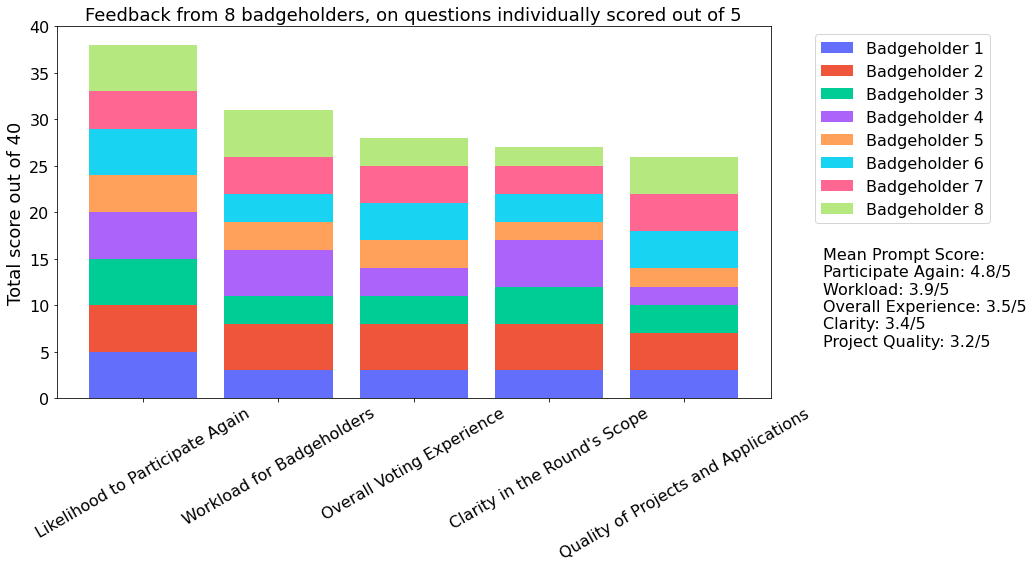

In [12]:
# Updated color scheme
colors = [
    "#636efa",
    "#EF553B",
    "#00cc96",
    "#ab63fa",
    "#FFA15A",
    "#19d3f3",
    "#FF6692",
    "#B6E880",
]

# Calculate total scores for each prompt
total_scores = df.groupby('Prompt')['Value'].sum().sort_values(ascending=False)
sorted_prompts = total_scores.index.tolist()

total_scores_short = df.groupby('Promptshort')['Value'].sum().sort_values(ascending=False)
sorted_promptshort = total_scores_short.index.tolist()

fig, ax = plt.subplots(figsize=(14, 8))

# List of badgeholders
badgeholders = df['Badgeholder'].unique()

# Plot data for each badgeholder
bottom_values = [0] * len(sorted_prompts)

for idx, badgeholder in enumerate(badgeholders):
    badgeholder_data = df[df['Badgeholder'] == badgeholder].set_index('Prompt').reindex(sorted_prompts).fillna(0)
    ax.bar(sorted_prompts, badgeholder_data['Value'], bottom=bottom_values, label=badgeholder, color=colors[idx % len(colors)])
    bottom_values += badgeholder_data['Value']

# Set the title and labels
ax.set_title('Feedback from 8 badgeholders, on questions individually scored out of 5', fontsize=18)
ax.set_ylabel('Total score out of 40', fontsize=18)
ax.set_ylim(0, 40)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='center', fontsize=16)
plt.yticks(fontsize=16)

# Add legend without the title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Calculate the mean value for each prompt
mean_values = df.groupby('Promptshort')['Value'].mean().reindex(sorted_promptshort).round(1)

# Create an inset plot for the mean values as text
inset_ax = fig.add_axes([0.72, 0.3, 0.2, 0.35])
inset_ax.axis('off')
mean_text = "\n".join([f"{promptshort}: {mean_value:.1f}/5" for promptshort, mean_value in mean_values.items()])
inset_ax.text(0.5, 0.5, f"Mean Prompt Score: \n{mean_text}", horizontalalignment='left', verticalalignment='center', fontsize=16)

#inset_ax.text(0.5, 0.5, f"\n\n{mean_text}", horizontalalignment='left', verticalalignment='center', fontsize=16)



# Display the plot
plt.tight_layout()
plt.show()

### Input, number of applications

[Text(0, 0, 'Infra & Deps'),
 Text(1, 0, 'Edu & Outreach'),
 Text(2, 0, 'Tools & Utilities'),
 Text(3, 0, 'Protocol R&D'),
 Text(4, 0, 'Product & UX'),
 Text(5, 0, 'Governance'),
 Text(6, 0, 'Other')]

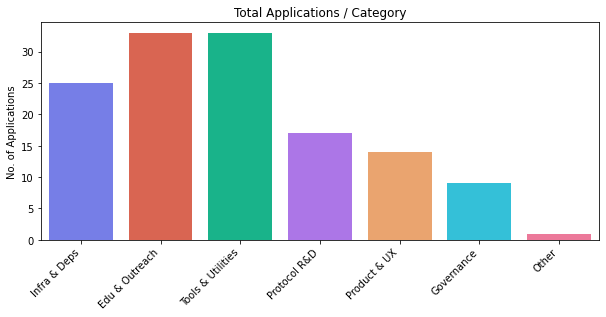

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
axx = ax

colors = [
    "#636efa",
    "#EF553B",
    "#00cc96",
    "#ab63fa",
    "#FFA15A",
    "#19d3f3",
    "#FF6692",
]

xx = ['Infra & Deps', 'Edu & Outreach', 'Tools & Utilities', 'Protocol R&D', 'Product & UX', 'Governance', 'Other']
yy = [25, 33, 33, 17, 14, 9, 1]
sns.barplot(x=xx, y=yy, ax=axx, palette=colors)
axx.set_title('Total Applications / Category')
axx.set_ylabel('No. of Applications')
axx.set_xlabel('')
axx.tick_params(axis='x', labelrotation=45)
axx.set_xticklabels(axx.get_xticklabels(), ha='right')

### Applicant Survey Results

In [5]:
survey_df=pd.read_csv("/Users/tom/Documents/FIL-RPGF/round1_feedback_report/anon_applicant_feedback_results_filrpgf1.csv")[['How clear was the distinction between the nomination and application phases?', "Do you feel you had enough information to successfully complete nominations?", "How easy was it to apply to the round through the platform website (fil-retropgf.io)?", "How would you rate the communication from the round operators during the application process?","How likely are you to build in the Filecoin ecosystem as a result of being a FIL-RetroPGF-1 recipient?"]]





In [6]:
survey_df.head()

,How clear was the distinction between the nomination and application phases?,Do you feel you had enough information to successfully complete nominations?,How easy was it to apply to the round through the platform website (fil-retropgf.io)?,How would you rate the communication from the round operators during the application process?,How likely are you to build in the Filecoin ecosystem as a result of being a FIL-RetroPGF-1 recipient?
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,3.0,4.0,2.0,3.0,2.0
3,4.0,4.0,4.0,4.0,4.0
4,5.0,5.0,5.0,5.0,5.0


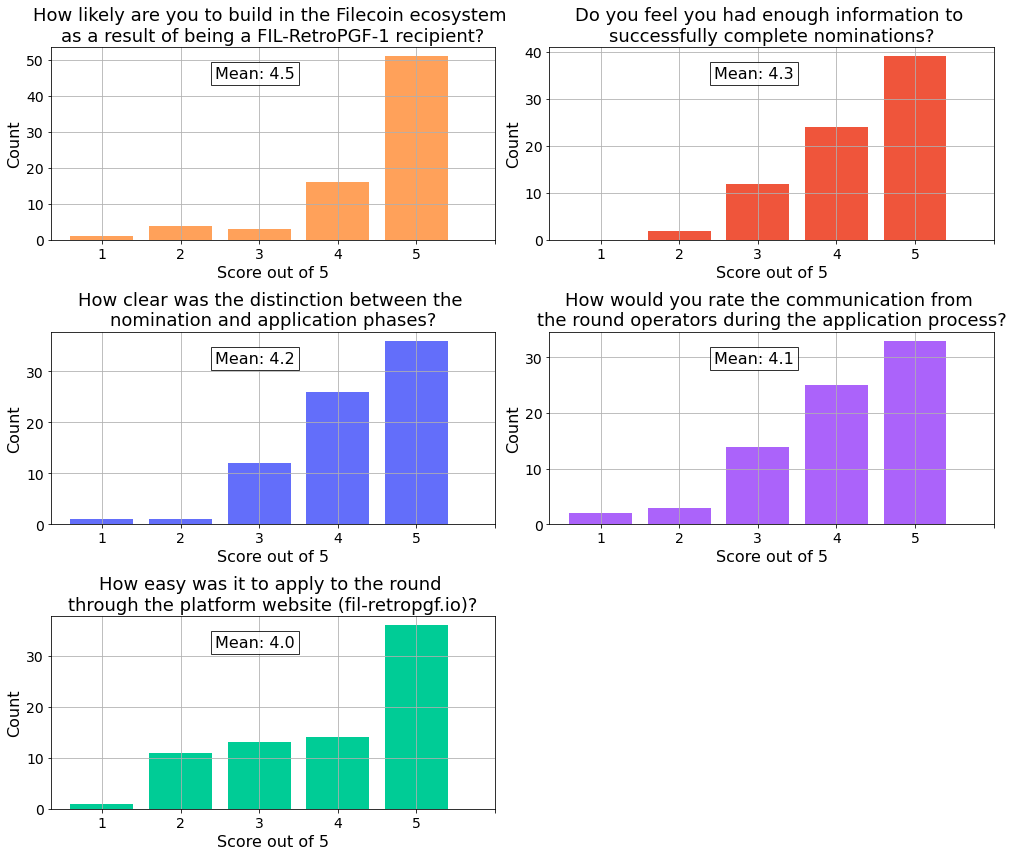

In [26]:
# Create bar charts for each question
questions = [
    'How clear was the distinction between the nomination and application phases?',
    'Do you feel you had enough information to successfully complete nominations?',
    'How easy was it to apply to the round through the platform website (fil-retropgf.io)?',
    'How would you rate the communication from the round operators during the application process?',
    'How likely are you to build in the Filecoin ecosystem as a result of being a FIL-RetroPGF-1 recipient?'
]

questionsnl = [
    'How clear was the distinction between the \nnomination and application phases?',
    'Do you feel you had enough information to \nsuccessfully complete nominations?',
    'How easy was it to apply to the round \nthrough the platform website (fil-retropgf.io)?',
    'How would you rate the communication from \nthe round operators during the application process?',
    'How likely are you to build in the Filecoin ecosystem \nas a result of being a FIL-RetroPGF-1 recipient?'
]


# Calculate the mean value for each question
mean_values = survey_df[questions].mean().round(2)

# Sort questions by mean value in descending order
sorted_questions = sorted(zip(questions, questionsnl, colors), key=lambda x: mean_values[x[0]], reverse=True)

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

# Plotting the bar charts for each question in sorted order
for ax, (question, questionnl, color) in zip(axs, sorted_questions):
    
    value_counts = survey_df[question].value_counts().sort_index()
    if question == 'Do you feel you had enough information to successfully complete nominations?':
        if 1 not in value_counts.index:
            value_counts.loc[1] = 0
        value_counts = value_counts.sort_index()
    value_counts.plot(kind='bar', ax=ax, color=color,width=0.8)
    
    ax.set_title(questionnl, fontsize=18)
    ax.set_xlabel('Score out of 5', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
#     ax.set_ylim(0, 52)
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    x_ticks_labels = ["1", "2", "3", "4", "5", ""]
    ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
    ax.tick_params(axis='x', labelrotation=0, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Annotate the mean value for each question
    mean_value = mean_values[question]
    ax.annotate(f'Mean: {mean_value.round(1):.1f}', xy=(0.55, 0.9), xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    ax.grid(True)

# Remove any empty subplot
if len(questions) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()